In [1]:
from sklearn.metrics import root_mean_squared_error

import time

from auxfunctions import *
from implementations import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
def rho_matern(d, nu_1, nu_2, nu_12, theta_1, theta_2, theta_12):
    return (theta_12**2/(theta_1*theta_2))**(d/2) * ( gamma(nu_1+d/2)*gamma(nu_2+d/2) / (gamma(nu_1)*gamma(nu_2)) )**(1/2) * gamma(nu_12)/gamma(nu_12+d/2)

In [3]:
d = 3
sup = 1

n = 1_000
n_test = 100

# $\nu_{1} = \nu_{2} = 1/2$

In [4]:
nu_1 = 1/2
nu_2 = 1/2

## $\theta_{1} = 2$, $\theta_{2} = 2.5$

In [5]:
theta_1 = 2
theta_2 = 2.5

In [6]:
nu_12 = ( nu_1 + nu_2 ) / 2
theta_12 = min(theta_1, theta_2)
rho_12 = rho_matern(d, nu_1, nu_2, nu_12, theta_1, theta_2, theta_12)
rho_12

0.7155417527999329

In [7]:
Ns = [2, 10, 100]
ns_clusters = [
    500, # 2
    100, # 10
    10,  # 100
]

rmses_NcoK_KM = []
rmses_NcoK_NN = []
rmses_coKNN = []

rmses_NcoK_KM_true = []
rmses_NcoK_NN_true = []
rmses_coKNN_true = []

times_NcoK_KM = []
times_NcoK_NN = []
times_coKNN = []

num_replications = 50

In [8]:
for _ in range(num_replications):
    X_1 = gen_observation_points(d, n + n_test, sup)
    X_2 = gen_observation_points(d, n, sup)
    sigma = K(X_1, X_2, matern_model(theta_1, nu_1), matern_model(theta_2, nu_2), matern_model(theta_12, nu_12), rho_12)

    Y = np.linalg.cholesky(sigma) @ np.random.normal(0, 1, (2*n + n_test))
    Y_1, Y_2 = Y[:(n+n_test)], Y[(n+n_test):]
 
    X_test, Y_test = X_1[:n_test], Y_1[:n_test]
    X_1, Y_1 = X_1[n_test:], Y_1[n_test:]

    sigma = sigma[n_test:, :][:, n_test:]

# CO KRIGING
    Y_coK = co_kriging(X_test, X_1, X_2, Y_1, Y_2, matern_model(theta_1, nu_1), matern_model(theta_12, nu_12), rho_12, sigma)

# CO KRIGING NN
    rmse_aux, rmse_true_aux, time_aux = [], [], []
    for N in Ns:    
        start_time = time.time()
        coKNN = coKrigingNN(X_1, X_2, Y_1, Y_2, N, matern_model, theta_1, theta_2, 
                            theta_12, nu_1, nu_2, nu_12, rho_12)
        Y_pred = coKNN.predict(X_test)
        end_time = time.time()

        time_aux.append(end_time - start_time)
        rmse_aux.append(root_mean_squared_error(Y_coK, Y_pred))
        rmse_true_aux.append(root_mean_squared_error(Y_test, Y_pred))
    rmses_coKNN.append(rmse_aux)
    rmses_coKNN_true.append(rmse_true_aux)
    times_coKNN.append(time_aux)

# NESTED CO KRIGING
    rmse_aux, rmse_true_aux, time_aux = [[], []], [[], []], [[], []]
    for n_clusters in ns_clusters:
    # NcoK KM
        start_time = time.time()
        NcoK = NestedCoKriging(X_1, X_2, Y_1, Y_2, matern_model, 
                                theta_1, theta_2, theta_12, nu_1,
                                nu_2, nu_12, rho_12)
        A_1 = gen_A(X_1, n_clusters)
        A_2 = gen_A(X_2, n_clusters)
        Y_pred = NcoK.predict(X_test, A_1, A_2)
        end_time = time.time()
        
        time_aux[0].append(end_time-start_time)
        rmse_aux[0].append(root_mean_squared_error(Y_coK, Y_pred))
        rmse_true_aux[0].append(root_mean_squared_error(Y_test, Y_pred))

    # NcoK NN
        start_time = time.time()
        Y_pred = NcoK.predict(X_test, NN=True, n_clusters=n_clusters)
        end_time = time.time()

        time_aux[1].append(end_time-start_time)
        rmse_aux[1].append(root_mean_squared_error(Y_coK, Y_pred))
        rmse_true_aux[1].append(root_mean_squared_error(Y_test, Y_pred))

    rmses_NcoK_KM.append(rmse_aux[0])
    rmses_NcoK_KM_true.append(rmse_true_aux[0])
    times_NcoK_KM.append(time_aux[0])

    rmses_NcoK_NN.append(rmse_aux[1])
    rmses_NcoK_NN_true.append(rmse_true_aux[1])
    times_NcoK_NN.append(time_aux[1])
    
    print(f'{_} listo :)')

0 listo :)
1 listo :)
2 listo :)
3 listo :)
4 listo :)
5 listo :)
6 listo :)
7 listo :)
8 listo :)
9 listo :)
10 listo :)
11 listo :)
12 listo :)
13 listo :)
14 listo :)
15 listo :)
16 listo :)
17 listo :)
18 listo :)
19 listo :)
20 listo :)
21 listo :)
22 listo :)
23 listo :)
24 listo :)
25 listo :)
26 listo :)
27 listo :)
28 listo :)
29 listo :)
30 listo :)
31 listo :)
32 listo :)
33 listo :)
34 listo :)
35 listo :)
36 listo :)
37 listo :)
38 listo :)
39 listo :)
40 listo :)
41 listo :)
42 listo :)
43 listo :)
44 listo :)
45 listo :)
46 listo :)
47 listo :)
48 listo :)
49 listo :)


### Resultados RMSE vs CoK

In [9]:
np.hstack([rmses_NcoK_KM, rmses_NcoK_NN, rmses_coKNN])

array([[0.04995504, 0.07410008, 0.05800999, 0.09706677, 0.0560663 ,
        0.0051434 , 0.19483581, 0.06496345, 0.00508868],
       [0.04855866, 0.07685573, 0.08460527, 0.08402112, 0.05560629,
        0.00533877, 0.18188968, 0.06776528, 0.00564541],
       [0.03725288, 0.07606822, 0.0718512 , 0.07951443, 0.05054001,
        0.0047737 , 0.21909505, 0.06183608, 0.00475665],
       [0.04982971, 0.08604642, 0.10751387, 0.1045769 , 0.05897903,
        0.00592094, 0.21583088, 0.06779445, 0.00611378],
       [0.05637407, 0.08113416, 0.08484604, 0.07803006, 0.0508441 ,
        0.00484318, 0.20665085, 0.06177805, 0.00486765],
       [0.03919359, 0.07799894, 0.07919532, 0.08918916, 0.04948104,
        0.00549598, 0.19266802, 0.05831602, 0.00556904],
       [0.05302146, 0.08029839, 0.07810042, 0.08107899, 0.04990077,
        0.00494558, 0.16405553, 0.05528153, 0.00501727],
       [0.04537209, 0.08482234, 0.09472368, 0.09179521, 0.06102595,
        0.0055689 , 0.22043012, 0.0702548 , 0.00567007],


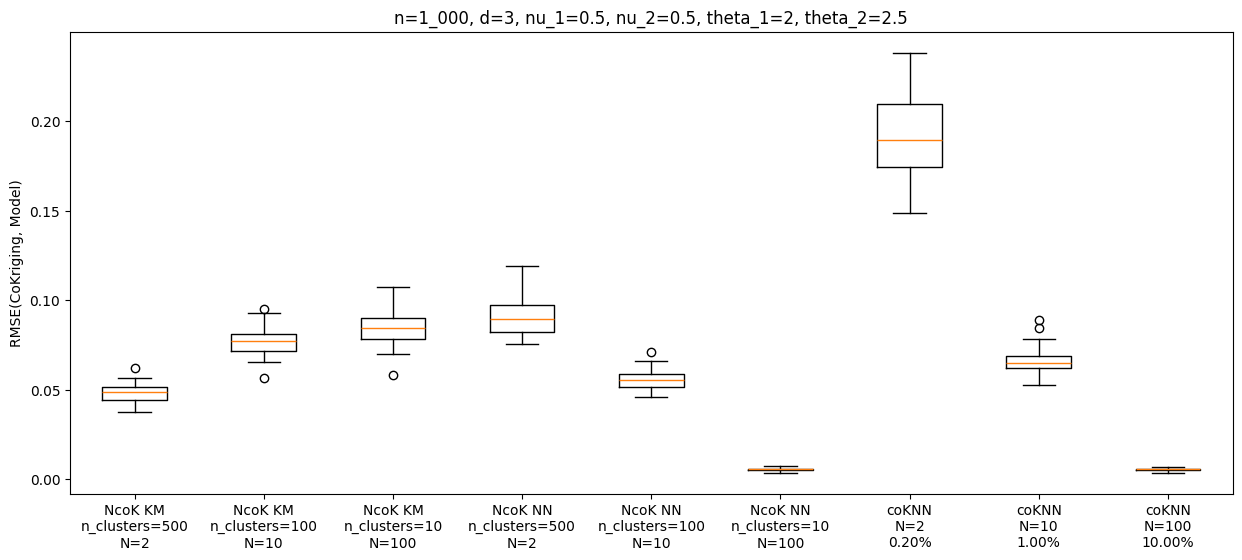

In [10]:
plt.figure(figsize=(15,6))

plt.boxplot(np.hstack([rmses_NcoK_KM, rmses_NcoK_NN, rmses_coKNN]))

plt.xticks(range(1, 1 + 2*len(ns_clusters) + len(Ns)),
           [f'NcoK KM\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'NcoK NN\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'coKNN\n{N=}\n{N/n:.2%}' for N in Ns])

plt.ylabel('RMSE(CoKriging, Model)')
plt.title(f'{n=:_.0f}, {d=}, {nu_1=}, {nu_2=}, {theta_1=}, {theta_2=}');

### Resultados RMSE vs Y_true

In [11]:
np.hstack([rmses_NcoK_KM_true, rmses_NcoK_NN_true, rmses_coKNN_true])

array([[0.35563546, 0.3699969 , 0.35606301, 0.3783016 , 0.35994884,
        0.35544058, 0.39900876, 0.35505684, 0.35534275],
       [0.31155188, 0.30070811, 0.31253355, 0.31634032, 0.31742584,
        0.30567253, 0.35437982, 0.32042491, 0.30568522],
       [0.38025569, 0.39184085, 0.38466522, 0.38375813, 0.36318052,
        0.36750638, 0.44258739, 0.36925984, 0.36746293],
       [0.33945961, 0.33492449, 0.34673282, 0.35017841, 0.3465616 ,
        0.334725  , 0.38085452, 0.34950964, 0.33468911],
       [0.36598073, 0.3725903 , 0.36714294, 0.37930181, 0.36573579,
        0.35794627, 0.41116418, 0.36538701, 0.35793575],
       [0.36752223, 0.38107239, 0.39430172, 0.38240078, 0.37003175,
        0.36650006, 0.41531582, 0.36754485, 0.36653656],
       [0.33563341, 0.34649243, 0.36147618, 0.34094505, 0.32866713,
        0.32950595, 0.37945457, 0.33180801, 0.32948448],
       [0.30281487, 0.2985057 , 0.3189269 , 0.32088141, 0.31177719,
        0.3043911 , 0.37180012, 0.31326239, 0.30446824],


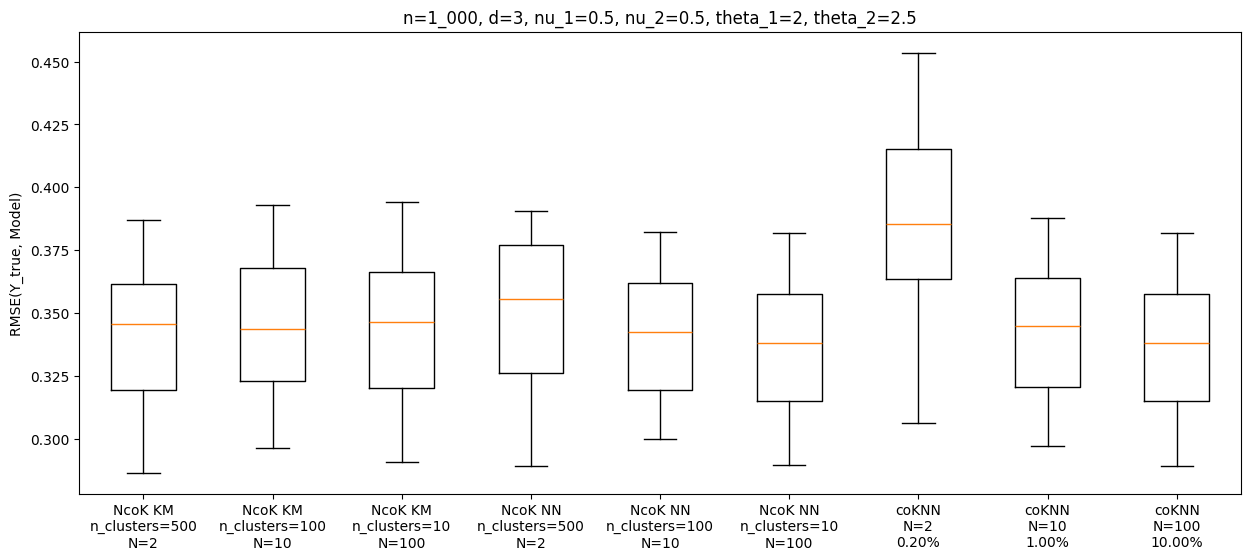

In [12]:
plt.figure(figsize=(15,6))

plt.boxplot(np.hstack([rmses_NcoK_KM_true, rmses_NcoK_NN_true, rmses_coKNN_true]))

plt.xticks(range(1, 1 + 2*len(ns_clusters) + len(Ns)),
           [f'NcoK KM\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'NcoK NN\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'coKNN\n{N=}\n{N/n:.2%}' for N in Ns])

plt.ylabel('RMSE(Y_true, Model)')
plt.title(f'{n=:_.0f}, {d=}, {nu_1=}, {nu_2=}, {theta_1=}, {theta_2=}');

### Resultados Times

In [13]:
np.hstack([times_NcoK_KM,times_NcoK_NN,times_coKNN])

array([[3.13940678e+01, 3.56609178e+00, 4.06834126e+00, 1.51189451e+03,
        7.09154754e+01, 1.00837417e+01, 1.68299675e-02, 5.05435467e-02,
        7.47250509e+00],
       [1.99351163e+01, 4.33780813e+00, 3.93279123e+00, 1.50039350e+03,
        7.08299081e+01, 9.91675496e+00, 4.60507870e-02, 5.78954220e-02,
        5.27719736e-01],
       [1.97333455e+01, 4.41706276e+00, 4.04606891e+00, 1.46759334e+03,
        7.06206267e+01, 9.95113707e+00, 2.50864029e-02, 5.79862595e-02,
        4.32995796e-01],
       [2.11007719e+01, 4.34847045e+00, 4.00336885e+00, 1.49824499e+03,
        7.05004992e+01, 9.89965534e+00, 3.30493450e-02, 6.75690174e-02,
        4.65112448e-01],
       [1.98172936e+01, 4.18224478e+00, 4.18323612e+00, 1.47872637e+03,
        6.87342730e+01, 1.02167640e+01, 3.03728580e-02, 5.01227379e-02,
        4.98999596e-01],
       [1.99368286e+01, 4.01650858e+00, 4.09571838e+00, 1.44244018e+03,
        7.04545920e+01, 1.01167963e+01, 2.97200680e-02, 6.53963089e-02,
        4.8

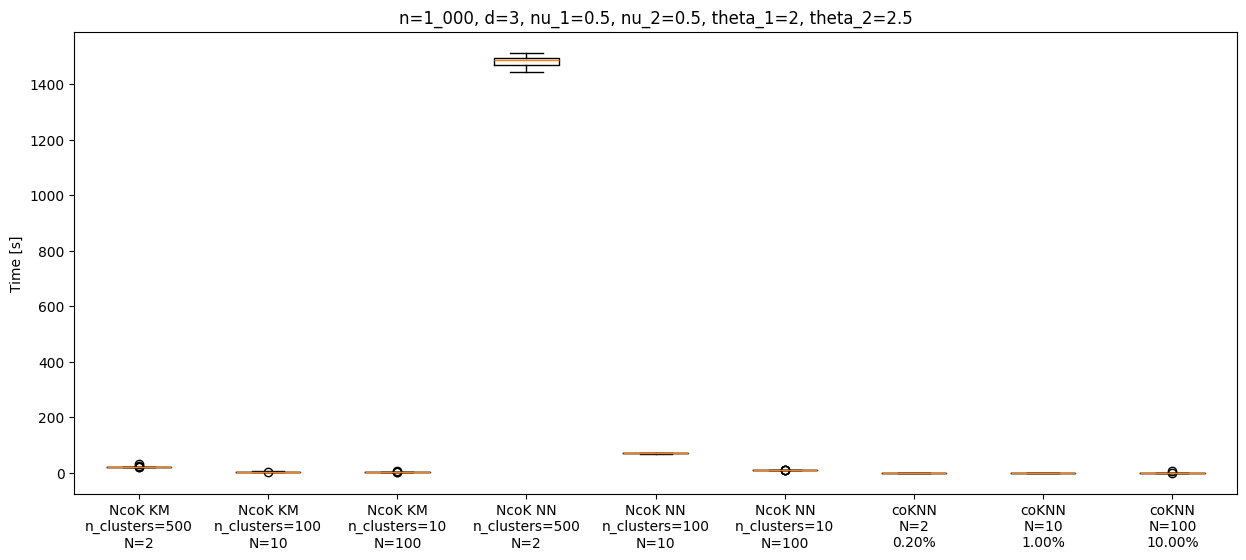

In [14]:
plt.figure(figsize=(15,6))

plt.boxplot(np.hstack([times_NcoK_KM,times_NcoK_NN,times_coKNN]))

plt.xticks(range(1, 1 + 2*len(ns_clusters) + len(Ns)),
           [f'NcoK KM\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'NcoK NN\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'coKNN\n{N=}\n{N/n:.2%}' for N in Ns])

plt.ylabel('Time [s]')
plt.title(f'{n=:_.0f}, {d=}, {nu_1=}, {nu_2=}, {theta_1=}, {theta_2=}');

## $\theta_{1} = 4$, $\theta_{2} = 5$

In [15]:
theta_1 = 4
theta_2 = 5

In [16]:
nu_12 = ( nu_1 + nu_2 ) / 2
theta_12 = min(theta_1, theta_2)
rho_12 = rho_matern(d, nu_1, nu_2, nu_12, theta_1, theta_2, theta_12)
rho_12

0.7155417527999329

In [17]:
Ns = [2, 10, 100]
ns_clusters = [
    500, # 2
    100, # 10
    10,  # 100
]

rmses_NcoK_KM = []
rmses_NcoK_NN = []
rmses_coKNN = []

rmses_NcoK_KM_true = []
rmses_NcoK_NN_true = []
rmses_coKNN_true = []

times_NcoK_KM = []
times_NcoK_NN = []
times_coKNN = []

num_replications = 50

In [18]:
for _ in range(num_replications):
    X_1 = gen_observation_points(d, n + n_test, sup)
    X_2 = gen_observation_points(d, n, sup)
    sigma = K(X_1, X_2, matern_model(theta_1, nu_1), matern_model(theta_2, nu_2), matern_model(theta_12, nu_12), rho_12)

    Y = np.linalg.cholesky(sigma) @ np.random.normal(0, 1, (2*n + n_test))
    Y_1, Y_2 = Y[:(n+n_test)], Y[(n+n_test):]
 
    X_test, Y_test = X_1[:n_test], Y_1[:n_test]
    X_1, Y_1 = X_1[n_test:], Y_1[n_test:]

    sigma = sigma[n_test:, :][:, n_test:]

# CO KRIGING
    Y_coK = co_kriging(X_test, X_1, X_2, Y_1, Y_2, matern_model(theta_1, nu_1), matern_model(theta_12, nu_12), rho_12, sigma)

# CO KRIGING NN
    rmse_aux, rmse_true_aux, time_aux = [], [], []
    for N in Ns:    
        start_time = time.time()
        coKNN = coKrigingNN(X_1, X_2, Y_1, Y_2, N, matern_model, theta_1, theta_2, 
                            theta_12, nu_1, nu_2, nu_12, rho_12)
        Y_pred = coKNN.predict(X_test)
        end_time = time.time()

        time_aux.append(end_time - start_time)
        rmse_aux.append(root_mean_squared_error(Y_coK, Y_pred))
        rmse_true_aux.append(root_mean_squared_error(Y_test, Y_pred))
    rmses_coKNN.append(rmse_aux)
    rmses_coKNN_true.append(rmse_true_aux)
    times_coKNN.append(time_aux)

# NESTED CO KRIGING
    rmse_aux, rmse_true_aux, time_aux = [[], []], [[], []], [[], []]
    for n_clusters in ns_clusters:
    # NcoK KM
        start_time = time.time()
        NcoK = NestedCoKriging(X_1, X_2, Y_1, Y_2, matern_model, 
                                theta_1, theta_2, theta_12, nu_1,
                                nu_2, nu_12, rho_12)
        A_1 = gen_A(X_1, n_clusters)
        A_2 = gen_A(X_2, n_clusters)
        Y_pred = NcoK.predict(X_test, A_1, A_2)
        end_time = time.time()
        
        time_aux[0].append(end_time-start_time)
        rmse_aux[0].append(root_mean_squared_error(Y_coK, Y_pred))
        rmse_true_aux[0].append(root_mean_squared_error(Y_test, Y_pred))

    # NcoK NN
        start_time = time.time()
        Y_pred = NcoK.predict(X_test, NN=True, n_clusters=n_clusters)
        end_time = time.time()

        time_aux[1].append(end_time-start_time)
        rmse_aux[1].append(root_mean_squared_error(Y_coK, Y_pred))
        rmse_true_aux[1].append(root_mean_squared_error(Y_test, Y_pred))

    rmses_NcoK_KM.append(rmse_aux[0])
    rmses_NcoK_KM_true.append(rmse_true_aux[0])
    times_NcoK_KM.append(time_aux[0])

    rmses_NcoK_NN.append(rmse_aux[1])
    rmses_NcoK_NN_true.append(rmse_true_aux[1])
    times_NcoK_NN.append(time_aux[1])
    
    print(f'{_} listo :)')
# 1274m 48.3s

0 listo :)
1 listo :)
2 listo :)
3 listo :)
4 listo :)
5 listo :)
6 listo :)
7 listo :)
8 listo :)
9 listo :)
10 listo :)
11 listo :)
12 listo :)
13 listo :)
14 listo :)
15 listo :)
16 listo :)
17 listo :)
18 listo :)
19 listo :)
20 listo :)
21 listo :)
22 listo :)
23 listo :)
24 listo :)
25 listo :)
26 listo :)
27 listo :)
28 listo :)
29 listo :)
30 listo :)
31 listo :)
32 listo :)
33 listo :)
34 listo :)
35 listo :)
36 listo :)
37 listo :)
38 listo :)
39 listo :)
40 listo :)
41 listo :)
42 listo :)
43 listo :)
44 listo :)
45 listo :)
46 listo :)
47 listo :)
48 listo :)
49 listo :)


### Resultados RMSE vs CoK

In [19]:
np.hstack([rmses_NcoK_KM, rmses_NcoK_NN, rmses_coKNN])

array([[0.06120273, 0.10274592, 0.08754563, 0.1176706 , 0.05623491,
        0.00536302, 0.24321551, 0.07107747, 0.00526844],
       [0.05638706, 0.10355851, 0.11337824, 0.14923092, 0.06935252,
        0.00623426, 0.25661163, 0.08366426, 0.00656563],
       [0.06058684, 0.0987245 , 0.10474964, 0.11255699, 0.06520937,
        0.00632267, 0.21454217, 0.07577042, 0.00624776],
       [0.04759014, 0.10690402, 0.08760053, 0.10209587, 0.06644406,
        0.00469604, 0.21282212, 0.08567832, 0.00470505],
       [0.06189404, 0.07253686, 0.09571124, 0.11955071, 0.05545503,
        0.00681636, 0.24132383, 0.05890733, 0.00677285],
       [0.06590732, 0.08377736, 0.10349618, 0.10850984, 0.07462612,
        0.00547308, 0.19391401, 0.08140592, 0.00558119],
       [0.06646708, 0.09685393, 0.11038391, 0.13769422, 0.07742475,
        0.00601657, 0.2516285 , 0.08575774, 0.00613992],
       [0.05442083, 0.09286513, 0.1178069 , 0.13209955, 0.05531412,
        0.00561346, 0.23062344, 0.06100092, 0.00536428],


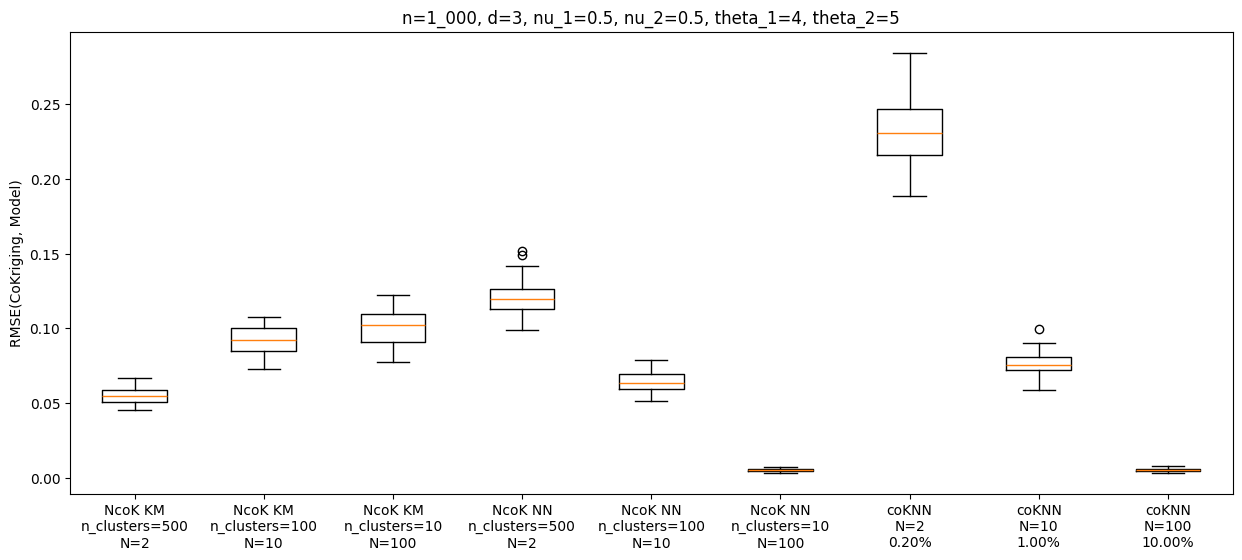

In [20]:
plt.figure(figsize=(15,6))

plt.boxplot(np.hstack([rmses_NcoK_KM, rmses_NcoK_NN, rmses_coKNN]))

plt.xticks(range(1, 1 + 2*len(ns_clusters) + len(Ns)),
           [f'NcoK KM\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'NcoK NN\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'coKNN\n{N=}\n{N/n:.2%}' for N in Ns])

plt.ylabel('RMSE(CoKriging, Model)')
plt.title(f'{n=:_.0f}, {d=}, {nu_1=}, {nu_2=}, {theta_1=}, {theta_2=}');

### Resultados RMSE vs Y_true

In [21]:
np.hstack([rmses_NcoK_KM_true, rmses_NcoK_NN_true, rmses_coKNN_true])

array([[0.51662633, 0.52229745, 0.51987847, 0.51009962, 0.51343941,
        0.51089535, 0.55984974, 0.51793419, 0.51087208],
       [0.45026721, 0.46392845, 0.48658774, 0.48999115, 0.47104218,
        0.45027982, 0.52826199, 0.46925495, 0.45031392],
       [0.42386972, 0.45939561, 0.45900555, 0.45249632, 0.43886166,
        0.42163146, 0.503992  , 0.44193218, 0.42165378],
       [0.50030083, 0.49494107, 0.47878846, 0.49645469, 0.49571234,
        0.49369234, 0.50147036, 0.4976117 , 0.49364819],
       [0.53832118, 0.52625794, 0.55082179, 0.55605121, 0.52561552,
        0.5285479 , 0.61843164, 0.52898502, 0.52859394],
       [0.43384726, 0.42064684, 0.42509125, 0.43653847, 0.41787352,
        0.42058799, 0.45277093, 0.42126935, 0.42065784],
       [0.38581267, 0.38615379, 0.37382431, 0.40383053, 0.389939  ,
        0.37555432, 0.4661525 , 0.38707503, 0.37549597],
       [0.41611515, 0.44735761, 0.44431405, 0.45281139, 0.42824321,
        0.42775728, 0.4760611 , 0.42784899, 0.42780977],


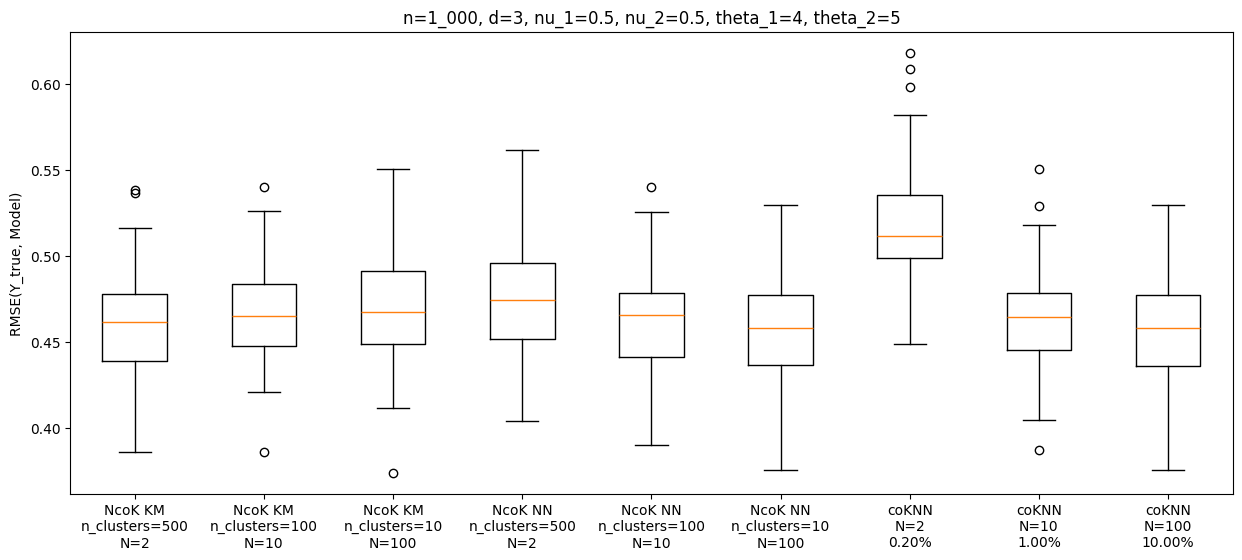

In [22]:
plt.figure(figsize=(15,6))

plt.boxplot(np.hstack([rmses_NcoK_KM_true, rmses_NcoK_NN_true, rmses_coKNN_true]))

plt.xticks(range(1, 1 + 2*len(ns_clusters) + len(Ns)),
           [f'NcoK KM\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'NcoK NN\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'coKNN\n{N=}\n{N/n:.2%}' for N in Ns])

plt.ylabel('RMSE(Y_true, Model)')
plt.title(f'{n=:_.0f}, {d=}, {nu_1=}, {nu_2=}, {theta_1=}, {theta_2=}');

### Resultados Times

In [23]:
np.hstack([times_NcoK_KM,times_NcoK_NN,times_coKNN])

array([[1.97339003e+01, 4.35023713e+00, 4.14982057e+00, 1.46979296e+03,
        6.78504400e+01, 9.65004992e+00, 1.63679123e-02, 6.93395138e-02,
        4.97002125e-01],
       [1.95084939e+01, 4.25011873e+00, 3.74993157e+00, 1.47991793e+03,
        6.77003078e+01, 9.61673021e+00, 2.62796879e-02, 5.39748669e-02,
        4.31946278e-01],
       [1.95433640e+01, 4.55000710e+00, 3.85034466e+00, 1.46604343e+03,
        6.81826072e+01, 9.91714168e+00, 1.68502331e-02, 6.60595894e-02,
        4.23256159e-01],
       [1.95173466e+01, 4.28339553e+00, 3.74915957e+00, 1.47961006e+03,
        6.91508365e+01, 9.71671247e+00, 3.34813595e-02, 6.67366982e-02,
        4.48763371e-01],
       [1.95140934e+01, 4.24020147e+00, 3.86665869e+00, 1.45080986e+03,
        6.95936327e+01, 9.93335843e+00, 4.22186852e-02, 5.78522682e-02,
        4.36058998e-01],
       [1.95519636e+01, 4.45044994e+00, 3.84956098e+00, 1.47472675e+03,
        6.82170429e+01, 9.90011764e+00, 2.34179497e-02, 4.99606133e-02,
        4.3

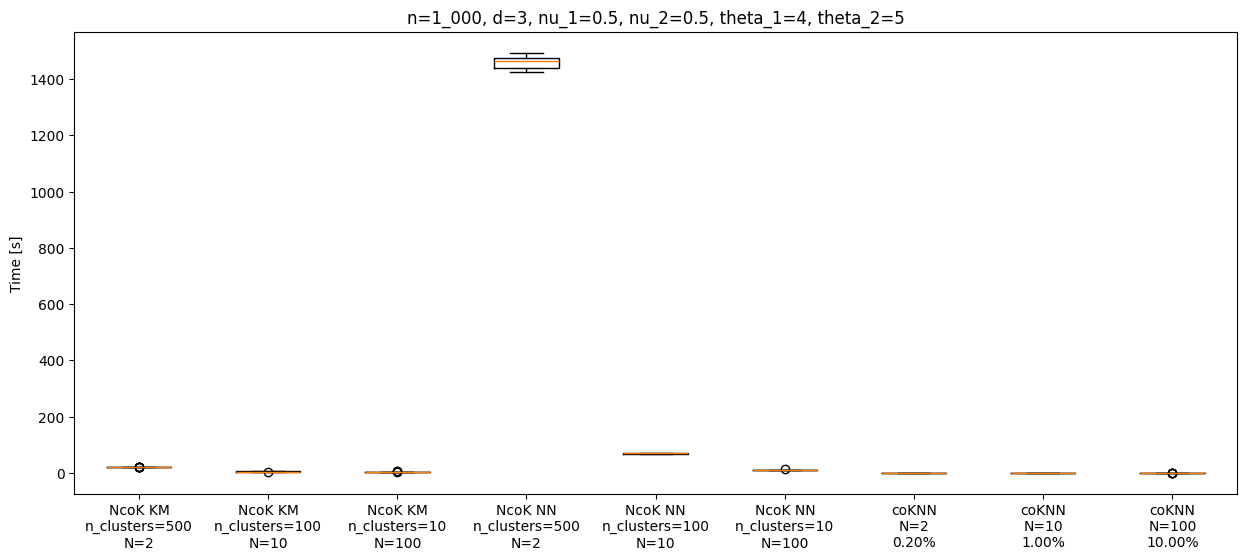

In [24]:
plt.figure(figsize=(15,6))

plt.boxplot(np.hstack([times_NcoK_KM,times_NcoK_NN,times_coKNN]))

plt.xticks(range(1, 1 + 2*len(ns_clusters) + len(Ns)),
           [f'NcoK KM\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'NcoK NN\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'coKNN\n{N=}\n{N/n:.2%}' for N in Ns])

plt.ylabel('Time [s]')
plt.title(f'{n=:_.0f}, {d=}, {nu_1=}, {nu_2=}, {theta_1=}, {theta_2=}');

# $\theta_1 = 4$, $\theta_2 = 5$

In [25]:
theta_1 = 4
theta_2 = 5

## $\nu_{1} = 1/2, \nu_{2} = 5/2$

In [26]:
nu_1 = 1/2
nu_2 = 5/2

In [27]:
nu_12 = ( nu_1 + nu_2 ) / 2
theta_12 = min(theta_1, theta_2)
rho_12 = rho_matern(d, nu_1, nu_2, nu_12, theta_1, theta_2, theta_12)
rho_12

0.5059644256269408

In [28]:
Ns = [2, 10, 100]
ns_clusters = [
    500, # 2
    100, # 10
    10,  # 100
]

rmses_NcoK_KM = []
rmses_NcoK_NN = []
rmses_coKNN = []

rmses_NcoK_KM_true = []
rmses_NcoK_NN_true = []
rmses_coKNN_true = []

times_NcoK_KM = []
times_NcoK_NN = []
times_coKNN = []

num_replications = 50

In [29]:
for _ in range(num_replications):
    X_1 = gen_observation_points(d, n + n_test, sup)
    X_2 = gen_observation_points(d, n, sup)
    sigma = K(X_1, X_2, matern_model(theta_1, nu_1), matern_model(theta_2, nu_2), matern_model(theta_12, nu_12), rho_12)

    Y = np.linalg.cholesky(sigma) @ np.random.normal(0, 1, (2*n + n_test))
    Y_1, Y_2 = Y[:(n+n_test)], Y[(n+n_test):]
 
    X_test, Y_test = X_1[:n_test], Y_1[:n_test]
    X_1, Y_1 = X_1[n_test:], Y_1[n_test:]

    sigma = sigma[n_test:, :][:, n_test:]

# CO KRIGING
    Y_coK = co_kriging(X_test, X_1, X_2, Y_1, Y_2, matern_model(theta_1, nu_1), matern_model(theta_12, nu_12), rho_12, sigma)

# CO KRIGING NN
    rmse_aux, rmse_true_aux, time_aux = [], [], []
    for N in Ns:    
        start_time = time.time()
        coKNN = coKrigingNN(X_1, X_2, Y_1, Y_2, N, matern_model, theta_1, theta_2, 
                            theta_12, nu_1, nu_2, nu_12, rho_12)
        Y_pred = coKNN.predict(X_test)
        end_time = time.time()

        time_aux.append(end_time - start_time)
        rmse_aux.append(root_mean_squared_error(Y_coK, Y_pred))
        rmse_true_aux.append(root_mean_squared_error(Y_test, Y_pred))
    rmses_coKNN.append(rmse_aux)
    rmses_coKNN_true.append(rmse_true_aux)
    times_coKNN.append(time_aux)

# NESTED CO KRIGING
    rmse_aux, rmse_true_aux, time_aux = [[], []], [[], []], [[], []]
    for n_clusters in ns_clusters:
    # NcoK KM
        start_time = time.time()
        NcoK = NestedCoKriging(X_1, X_2, Y_1, Y_2, matern_model, 
                                theta_1, theta_2, theta_12, nu_1,
                                nu_2, nu_12, rho_12)
        A_1 = gen_A(X_1, n_clusters)
        A_2 = gen_A(X_2, n_clusters)
        Y_pred = NcoK.predict(X_test, A_1, A_2)
        end_time = time.time()
        
        time_aux[0].append(end_time-start_time)
        rmse_aux[0].append(root_mean_squared_error(Y_coK, Y_pred))
        rmse_true_aux[0].append(root_mean_squared_error(Y_test, Y_pred))

    # NcoK NN
        start_time = time.time()
        Y_pred = NcoK.predict(X_test, NN=True, n_clusters=n_clusters)
        end_time = time.time()

        time_aux[1].append(end_time-start_time)
        rmse_aux[1].append(root_mean_squared_error(Y_coK, Y_pred))
        rmse_true_aux[1].append(root_mean_squared_error(Y_test, Y_pred))

    rmses_NcoK_KM.append(rmse_aux[0])
    rmses_NcoK_KM_true.append(rmse_true_aux[0])
    times_NcoK_KM.append(time_aux[0])

    rmses_NcoK_NN.append(rmse_aux[1])
    rmses_NcoK_NN_true.append(rmse_true_aux[1])
    times_NcoK_NN.append(time_aux[1])
    
    print(f'{_} listo :)')

0 listo :)
1 listo :)
2 listo :)
3 listo :)
4 listo :)
5 listo :)
6 listo :)
7 listo :)
8 listo :)
9 listo :)
10 listo :)
11 listo :)
12 listo :)
13 listo :)
14 listo :)
15 listo :)
16 listo :)
17 listo :)
18 listo :)
19 listo :)
20 listo :)
21 listo :)
22 listo :)
23 listo :)
24 listo :)
25 listo :)
26 listo :)
27 listo :)
28 listo :)
29 listo :)
30 listo :)
31 listo :)
32 listo :)
33 listo :)
34 listo :)
35 listo :)
36 listo :)
37 listo :)
38 listo :)
39 listo :)
40 listo :)
41 listo :)
42 listo :)
43 listo :)
44 listo :)
45 listo :)
46 listo :)
47 listo :)
48 listo :)
49 listo :)


### Resultados RMSE vs CoK

In [30]:
np.hstack([rmses_NcoK_KM, rmses_NcoK_NN, rmses_coKNN])

array([[0.07751399, 0.10794992, 0.09821335, 0.13093831, 0.09277771,
        0.0125991 , 0.24096406, 0.09732813, 0.01238772],
       [0.0785445 , 0.08774533, 0.08991416, 0.12937479, 0.08017985,
        0.01291381, 0.26774231, 0.09883977, 0.0126883 ],
       [0.0568408 , 0.1079819 , 0.08913946, 0.13626136, 0.10597835,
        0.01234211, 0.26989761, 0.1140769 , 0.01230735],
       [0.06208811, 0.08771658, 0.09310418, 0.11484252, 0.08028147,
        0.01223888, 0.25502694, 0.08790244, 0.01278573],
       [0.08497536, 0.10034326, 0.10348576, 0.14113487, 0.09421575,
        0.01372097, 0.28356291, 0.10137674, 0.01390973],
       [0.06608849, 0.0950578 , 0.08487328, 0.11009534, 0.08384165,
        0.01527916, 0.25170675, 0.10112761, 0.01513207],
       [0.07725697, 0.09075892, 0.078994  , 0.12507236, 0.09554383,
        0.01130879, 0.26407138, 0.1163596 , 0.01154319],
       [0.06723414, 0.08882979, 0.11075814, 0.12059534, 0.1038239 ,
        0.01274014, 0.24812594, 0.11233053, 0.0126695 ],


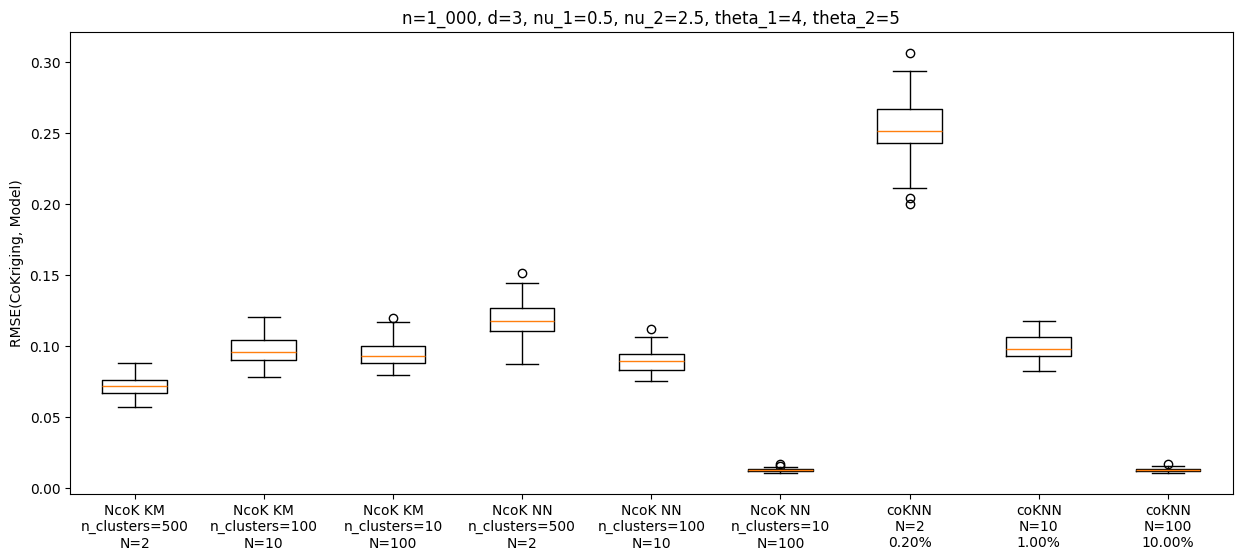

In [31]:
plt.figure(figsize=(15,6))

plt.boxplot(np.hstack([rmses_NcoK_KM, rmses_NcoK_NN, rmses_coKNN]))

plt.xticks(range(1, 1 + 2*len(ns_clusters) + len(Ns)),
           [f'NcoK KM\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'NcoK NN\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'coKNN\n{N=}\n{N/n:.2%}' for N in Ns])

plt.ylabel('RMSE(CoKriging, Model)')
plt.title(f'{n=:_.0f}, {d=}, {nu_1=}, {nu_2=}, {theta_1=}, {theta_2=}');

### Resultados RMSE vs Y_true

In [32]:
np.hstack([rmses_NcoK_KM_true, rmses_NcoK_NN_true, rmses_coKNN_true])

array([[0.44078337, 0.44221033, 0.46042509, 0.46187995, 0.4658537 ,
        0.44491015, 0.55597021, 0.4678218 , 0.44492867],
       [0.48010851, 0.47213658, 0.4661034 , 0.50121495, 0.48334772,
        0.45760638, 0.5483948 , 0.49332771, 0.45763699],
       [0.5342694 , 0.54365917, 0.54719253, 0.54642458, 0.53523996,
        0.53866423, 0.56773879, 0.5395081 , 0.53846491],
       [0.46457642, 0.48763927, 0.46265579, 0.48359747, 0.47101734,
        0.46562112, 0.55345716, 0.46552602, 0.46584227],
       [0.46758726, 0.46039237, 0.4724451 , 0.48097265, 0.46324832,
        0.45920268, 0.52449961, 0.45792494, 0.45936158],
       [0.42722681, 0.42682796, 0.42946411, 0.42926656, 0.43685107,
        0.42498436, 0.44798981, 0.42991385, 0.42478267],
       [0.44910202, 0.46232548, 0.44184038, 0.45850115, 0.4577578 ,
        0.44944174, 0.51443367, 0.46153029, 0.44915202],
       [0.48463129, 0.49636736, 0.50102569, 0.48930903, 0.49005804,
        0.47063384, 0.53848305, 0.48724261, 0.47059225],


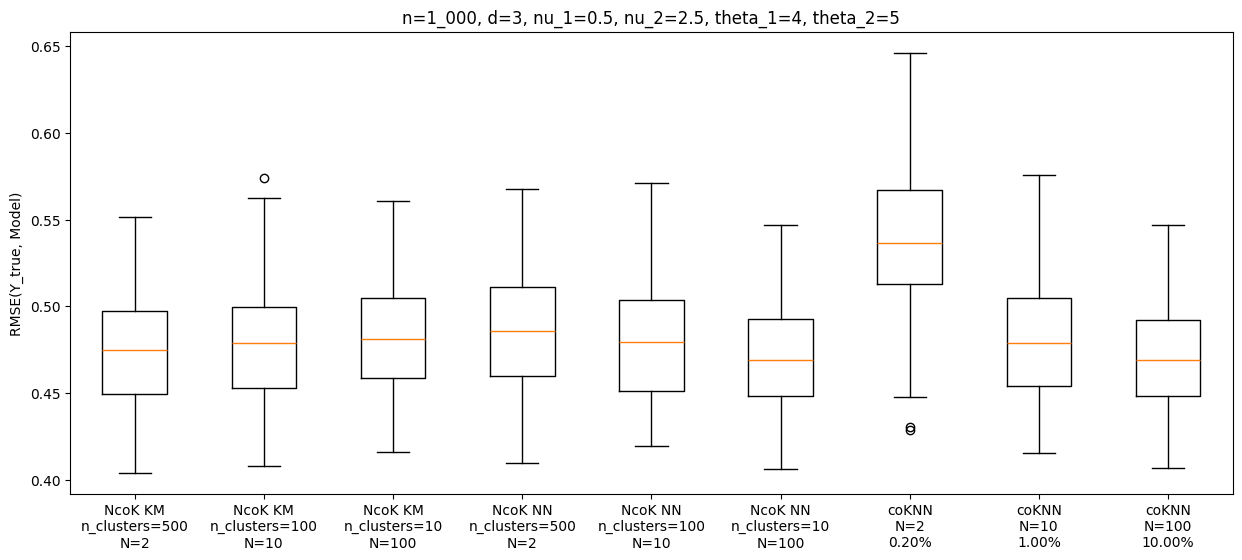

In [33]:
plt.figure(figsize=(15,6))

plt.boxplot(np.hstack([rmses_NcoK_KM_true, rmses_NcoK_NN_true, rmses_coKNN_true]))

plt.xticks(range(1, 1 + 2*len(ns_clusters) + len(Ns)),
           [f'NcoK KM\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'NcoK NN\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'coKNN\n{N=}\n{N/n:.2%}' for N in Ns])

plt.ylabel('RMSE(Y_true, Model)')
plt.title(f'{n=:_.0f}, {d=}, {nu_1=}, {nu_2=}, {theta_1=}, {theta_2=}');

### Resultados Times

In [34]:
np.hstack([times_NcoK_KM,times_NcoK_NN,times_coKNN])

array([[2.19776282e+01, 4.38365936e+00, 7.84864116e+00, 1.66999466e+03,
        8.11838958e+01, 1.03418996e+01, 3.33359241e-02, 6.50765896e-02,
        4.74102974e-01],
       [2.20828483e+01, 4.43410158e+00, 3.69995618e+00, 1.72632694e+03,
        7.81667550e+01, 9.85007501e+00, 3.19411755e-02, 5.05502224e-02,
        4.50075388e-01],
       [2.19670198e+01, 4.48380518e+00, 3.85032988e+00, 1.72974497e+03,
        7.80653741e+01, 9.90004420e+00, 3.34663391e-02, 6.68363571e-02,
        4.32986021e-01],
       [2.19520764e+01, 4.43378043e+00, 3.73328590e+00, 1.65761142e+03,
        7.98833308e+01, 9.90005755e+00, 3.34382057e-02, 6.69918060e-02,
        4.31034088e-01],
       [2.19679668e+01, 4.50033164e+00, 3.73320508e+00, 1.66406139e+03,
        8.03003376e+01, 9.93825507e+00, 2.33952999e-02, 7.94072151e-02,
        4.69476938e-01],
       [2.20338840e+01, 4.38342237e+00, 5.03286862e+00, 1.72132813e+03,
        8.07175667e+01, 1.00413475e+01, 3.19581032e-02, 5.15096188e-02,
        4.3

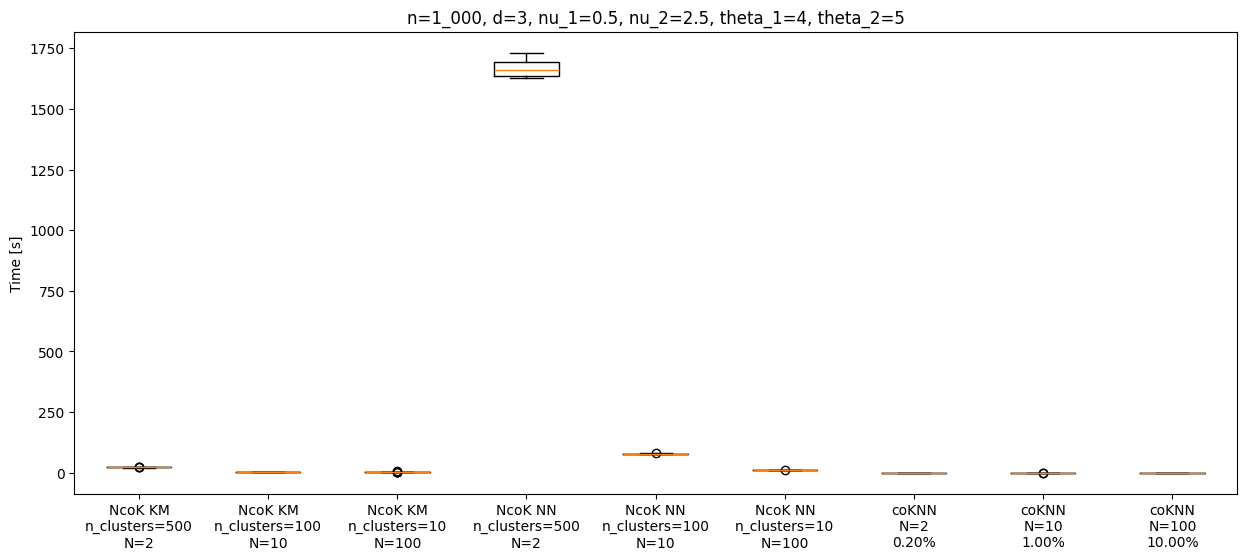

In [35]:
plt.figure(figsize=(15,6))

plt.boxplot(np.hstack([times_NcoK_KM,times_NcoK_NN,times_coKNN]))

plt.xticks(range(1, 1 + 2*len(ns_clusters) + len(Ns)),
           [f'NcoK KM\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'NcoK NN\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'coKNN\n{N=}\n{N/n:.2%}' for N in Ns])

plt.ylabel('Time [s]')
plt.title(f'{n=:_.0f}, {d=}, {nu_1=}, {nu_2=}, {theta_1=}, {theta_2=}');

## $\nu_{1} = 5/2, \nu_{2} = 1/2$

In [36]:
nu_1 = 5/2
nu_2 = 1/2

In [37]:
nu_12 = ( nu_1 + nu_2 ) / 2
theta_12 = min(theta_1, theta_2)
rho_12 = rho_matern(d, nu_1, nu_2, nu_12, theta_1, theta_2, theta_12)
rho_12

0.5059644256269408

In [38]:
Ns = [2, 10, 100]
ns_clusters = [
    500, # 2
    100, # 10
    10,  # 100
]

rmses_NcoK_KM = []
rmses_NcoK_NN = []
rmses_coKNN = []

rmses_NcoK_KM_true = []
rmses_NcoK_NN_true = []
rmses_coKNN_true = []

times_NcoK_KM = []
times_NcoK_NN = []
times_coKNN = []

num_replications = 50

In [39]:
for _ in range(num_replications):
    X_1 = gen_observation_points(d, n + n_test, sup)
    X_2 = gen_observation_points(d, n, sup)
    sigma = K(X_1, X_2, matern_model(theta_1, nu_1), matern_model(theta_2, nu_2), matern_model(theta_12, nu_12), rho_12)

    Y = np.linalg.cholesky(sigma) @ np.random.normal(0, 1, (2*n + n_test))
    Y_1, Y_2 = Y[:(n+n_test)], Y[(n+n_test):]
 
    X_test, Y_test = X_1[:n_test], Y_1[:n_test]
    X_1, Y_1 = X_1[n_test:], Y_1[n_test:]

    sigma = sigma[n_test:, :][:, n_test:]

# CO KRIGING
    Y_coK = co_kriging(X_test, X_1, X_2, Y_1, Y_2, matern_model(theta_1, nu_1), matern_model(theta_12, nu_12), rho_12, sigma)

# CO KRIGING NN
    rmse_aux, rmse_true_aux, time_aux = [], [], []
    for N in Ns:    
        start_time = time.time()
        coKNN = coKrigingNN(X_1, X_2, Y_1, Y_2, N, matern_model, theta_1, theta_2, 
                            theta_12, nu_1, nu_2, nu_12, rho_12)
        Y_pred = coKNN.predict(X_test)
        end_time = time.time()

        time_aux.append(end_time - start_time)
        rmse_aux.append(root_mean_squared_error(Y_coK, Y_pred))
        rmse_true_aux.append(root_mean_squared_error(Y_test, Y_pred))
    rmses_coKNN.append(rmse_aux)
    rmses_coKNN_true.append(rmse_true_aux)
    times_coKNN.append(time_aux)

# NESTED CO KRIGING
    rmse_aux, rmse_true_aux, time_aux = [[], []], [[], []], [[], []]
    for n_clusters in ns_clusters:
    # NcoK KM
        start_time = time.time()
        NcoK = NestedCoKriging(X_1, X_2, Y_1, Y_2, matern_model, 
                                theta_1, theta_2, theta_12, nu_1,
                                nu_2, nu_12, rho_12)
        A_1 = gen_A(X_1, n_clusters)
        A_2 = gen_A(X_2, n_clusters)
        Y_pred = NcoK.predict(X_test, A_1, A_2)
        end_time = time.time()
        
        time_aux[0].append(end_time-start_time)
        rmse_aux[0].append(root_mean_squared_error(Y_coK, Y_pred))
        rmse_true_aux[0].append(root_mean_squared_error(Y_test, Y_pred))

    # NcoK NN
        start_time = time.time()
        Y_pred = NcoK.predict(X_test, NN=True, n_clusters=n_clusters)
        end_time = time.time()

        time_aux[1].append(end_time-start_time)
        rmse_aux[1].append(root_mean_squared_error(Y_coK, Y_pred))
        rmse_true_aux[1].append(root_mean_squared_error(Y_test, Y_pred))

    rmses_NcoK_KM.append(rmse_aux[0])
    rmses_NcoK_KM_true.append(rmse_true_aux[0])
    times_NcoK_KM.append(time_aux[0])

    rmses_NcoK_NN.append(rmse_aux[1])
    rmses_NcoK_NN_true.append(rmse_true_aux[1])
    times_NcoK_NN.append(time_aux[1])
    
    print(f'{_} listo :)')

0 listo :)
1 listo :)
2 listo :)
3 listo :)
4 listo :)
5 listo :)
6 listo :)
7 listo :)
8 listo :)
9 listo :)
10 listo :)
11 listo :)
12 listo :)
13 listo :)
14 listo :)
15 listo :)
16 listo :)
17 listo :)
18 listo :)
19 listo :)
20 listo :)
21 listo :)
22 listo :)
23 listo :)
24 listo :)
25 listo :)
26 listo :)
27 listo :)
28 listo :)
29 listo :)
30 listo :)
31 listo :)
32 listo :)
33 listo :)
34 listo :)
35 listo :)
36 listo :)
37 listo :)
38 listo :)
39 listo :)
40 listo :)
41 listo :)
42 listo :)
43 listo :)
44 listo :)
45 listo :)
46 listo :)
47 listo :)
48 listo :)
49 listo :)


### Resultados RMSE vs CoK

In [40]:
np.hstack([rmses_NcoK_KM, rmses_NcoK_NN, rmses_coKNN])

array([[0.01187996, 0.01809869, 0.00771671, 0.02484626, 0.01778116,
        0.00184306, 0.10584122, 0.02037589, 0.00186064],
       [0.01258864, 0.01814298, 0.00995241, 0.02807518, 0.02057367,
        0.00164872, 0.08666043, 0.02549084, 0.00172576],
       [0.01120708, 0.01593062, 0.00958346, 0.02424109, 0.0133236 ,
        0.00166149, 0.09734167, 0.01626289, 0.00164828],
       [0.01156575, 0.01905549, 0.01039185, 0.02204648, 0.01416024,
        0.00174586, 0.10174866, 0.01739358, 0.0017361 ],
       [0.01058824, 0.01999967, 0.00880858, 0.02425486, 0.01468824,
        0.00186244, 0.12515306, 0.01962644, 0.00195573],
       [0.00969397, 0.01738931, 0.00903837, 0.0228573 , 0.0139912 ,
        0.00179498, 0.11687427, 0.0191664 , 0.00179289],
       [0.01099965, 0.0159535 , 0.00926505, 0.0223521 , 0.01750786,
        0.00115726, 0.09703264, 0.02061025, 0.00116367],
       [0.01081821, 0.01739585, 0.01412878, 0.02202658, 0.01405989,
        0.00155398, 0.08432503, 0.01889488, 0.00160242],


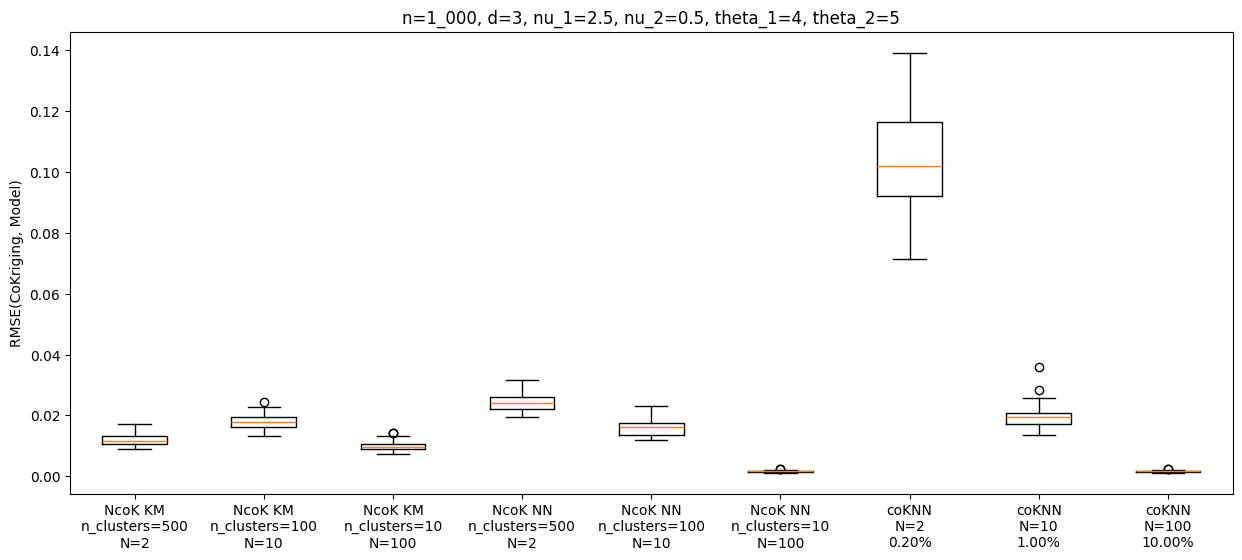

In [41]:
plt.figure(figsize=(15,6))

plt.boxplot(np.hstack([rmses_NcoK_KM, rmses_NcoK_NN, rmses_coKNN]))

plt.xticks(range(1, 1 + 2*len(ns_clusters) + len(Ns)),
           [f'NcoK KM\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'NcoK NN\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'coKNN\n{N=}\n{N/n:.2%}' for N in Ns])

plt.ylabel('RMSE(CoKriging, Model)')
plt.title(f'{n=:_.0f}, {d=}, {nu_1=}, {nu_2=}, {theta_1=}, {theta_2=}');

### Resultados RMSE vs Y_true

In [42]:
np.hstack([rmses_NcoK_KM_true, rmses_NcoK_NN_true, rmses_coKNN_true])

array([[0.01479186, 0.02353663, 0.01479362, 0.02906969, 0.02302241,
        0.01271125, 0.10675425, 0.02554798, 0.01271313],
       [0.01947728, 0.02484181, 0.01734922, 0.03113178, 0.02659256,
        0.01370124, 0.09172667, 0.03084101, 0.01371863],
       [0.014415  , 0.02038223, 0.01352664, 0.02636694, 0.01678135,
        0.01127397, 0.09802406, 0.01959354, 0.01125429],
       [0.02171477, 0.02465606, 0.02015015, 0.03034615, 0.02406929,
        0.01805171, 0.09962706, 0.02656328, 0.0180628 ],
       [0.01815876, 0.02730704, 0.01557509, 0.02862551, 0.02096317,
        0.01486159, 0.12525835, 0.02458694, 0.01486571],
       [0.0163517 , 0.01899093, 0.01308196, 0.0256436 , 0.01798139,
        0.01132302, 0.11661292, 0.02212221, 0.01135663],
       [0.01347134, 0.0189131 , 0.01352029, 0.02473013, 0.01993707,
        0.01006625, 0.09717989, 0.0230156 , 0.01008331],
       [0.01566947, 0.02346432, 0.01966533, 0.02607197, 0.01904353,
        0.01057522, 0.08495508, 0.02429592, 0.01055666],


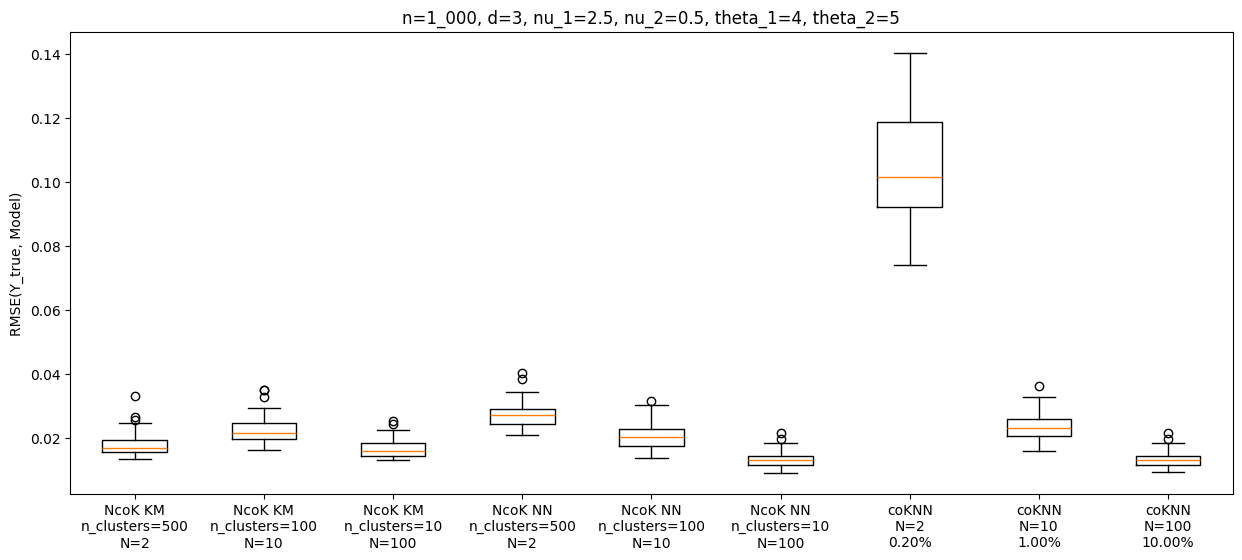

In [43]:
plt.figure(figsize=(15,6))

plt.boxplot(np.hstack([rmses_NcoK_KM_true, rmses_NcoK_NN_true, rmses_coKNN_true]))

plt.xticks(range(1, 1 + 2*len(ns_clusters) + len(Ns)),
           [f'NcoK KM\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'NcoK NN\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'coKNN\n{N=}\n{N/n:.2%}' for N in Ns])

plt.ylabel('RMSE(Y_true, Model)')
plt.title(f'{n=:_.0f}, {d=}, {nu_1=}, {nu_2=}, {theta_1=}, {theta_2=}');

### Resultados Times

In [44]:
np.hstack([times_NcoK_KM,times_NcoK_NN,times_coKNN])

array([[2.18587854e+01, 3.03332615e+00, 3.56541443e+00, 1.64279651e+03,
        7.68671362e+01, 9.36801171e+00, 3.15277576e-02, 4.70335484e-02,
        3.76685143e-01],
       [2.16028574e+01, 3.06687808e+00, 3.58306789e+00, 1.62824459e+03,
        7.78004389e+01, 9.38342643e+00, 1.69141293e-02, 6.63461685e-02,
        3.96234751e-01],
       [2.16173086e+01, 3.07951283e+00, 3.58032393e+00, 1.63076078e+03,
        7.54896464e+01, 9.35006881e+00, 3.34498882e-02, 4.97045517e-02,
        3.83238077e-01],
       [2.16336865e+01, 3.05025792e+00, 3.58310175e+00, 1.69012808e+03,
        7.55004411e+01, 9.34901285e+00, 4.13959026e-02, 5.84928989e-02,
        3.66673231e-01],
       [2.15835330e+01, 2.96653128e+00, 3.50004435e+00, 1.64956139e+03,
        7.53170931e+01, 9.29992557e+00, 1.66046619e-02, 5.10778427e-02,
        3.83196354e-01],
       [2.15335324e+01, 3.08318090e+00, 3.71998715e+00, 1.69837853e+03,
        7.54000876e+01, 9.56333065e+00, 3.05769444e-02, 5.24454117e-02,
        3.6

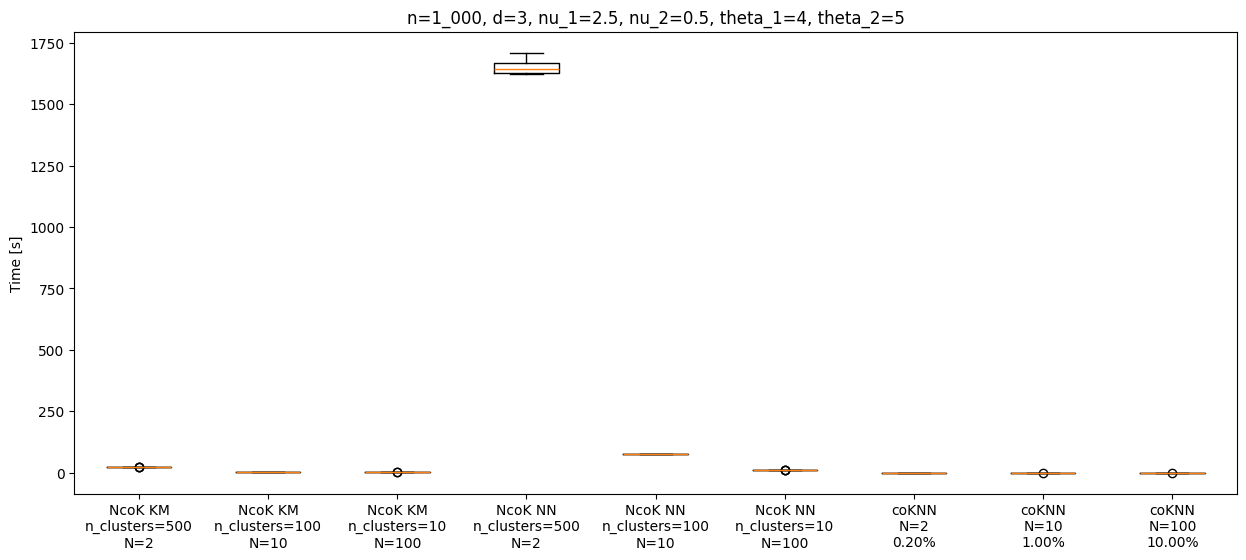

In [45]:
plt.figure(figsize=(15,6))

plt.boxplot(np.hstack([times_NcoK_KM,times_NcoK_NN,times_coKNN]))

plt.xticks(range(1, 1 + 2*len(ns_clusters) + len(Ns)),
           [f'NcoK KM\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'NcoK NN\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'coKNN\n{N=}\n{N/n:.2%}' for N in Ns])

plt.ylabel('Time [s]')
plt.title(f'{n=:_.0f}, {d=}, {nu_1=}, {nu_2=}, {theta_1=}, {theta_2=}');

## $\nu_{1} = 5/2, \nu_{2} = 5/2$

In [46]:
nu_1 = 5/2
nu_2 = 5/2

In [47]:
nu_12 = ( nu_1 + nu_2 ) / 2
theta_12 = min(theta_1, theta_2)
rho_12 = rho_matern(d, nu_1, nu_2, nu_12, theta_1, theta_2, theta_12)
rho_12

0.7155417527999329

In [48]:
Ns = [2, 10, 100]
ns_clusters = [
    500, # 2
    100, # 10
    10,  # 100
]

rmses_NcoK_KM = []
rmses_NcoK_NN = []
rmses_coKNN = []

rmses_NcoK_KM_true = []
rmses_NcoK_NN_true = []
rmses_coKNN_true = []

times_NcoK_KM = []
times_NcoK_NN = []
times_coKNN = []

num_replications = 50

In [49]:
for _ in range(num_replications):
    X_1 = gen_observation_points(d, n + n_test, sup)
    X_2 = gen_observation_points(d, n, sup)
    sigma = K(X_1, X_2, matern_model(theta_1, nu_1), matern_model(theta_2, nu_2), matern_model(theta_12, nu_12), rho_12)

    Y = np.linalg.cholesky(sigma) @ np.random.normal(0, 1, (2*n + n_test))
    Y_1, Y_2 = Y[:(n+n_test)], Y[(n+n_test):]
 
    X_test, Y_test = X_1[:n_test], Y_1[:n_test]
    X_1, Y_1 = X_1[n_test:], Y_1[n_test:]

    sigma = sigma[n_test:, :][:, n_test:]

# CO KRIGING
    Y_coK = co_kriging(X_test, X_1, X_2, Y_1, Y_2, matern_model(theta_1, nu_1), matern_model(theta_12, nu_12), rho_12, sigma)

# CO KRIGING NN
    rmse_aux, rmse_true_aux, time_aux = [], [], []
    for N in Ns:    
        start_time = time.time()
        coKNN = coKrigingNN(X_1, X_2, Y_1, Y_2, N, matern_model, theta_1, theta_2, 
                            theta_12, nu_1, nu_2, nu_12, rho_12)
        Y_pred = coKNN.predict(X_test)
        end_time = time.time()

        time_aux.append(end_time - start_time)
        rmse_aux.append(root_mean_squared_error(Y_coK, Y_pred))
        rmse_true_aux.append(root_mean_squared_error(Y_test, Y_pred))
    rmses_coKNN.append(rmse_aux)
    rmses_coKNN_true.append(rmse_true_aux)
    times_coKNN.append(time_aux)

# NESTED CO KRIGING
    rmse_aux, rmse_true_aux, time_aux = [[], []], [[], []], [[], []]
    for n_clusters in ns_clusters:
    # NcoK KM
        start_time = time.time()
        NcoK = NestedCoKriging(X_1, X_2, Y_1, Y_2, matern_model, 
                                theta_1, theta_2, theta_12, nu_1,
                                nu_2, nu_12, rho_12)
        A_1 = gen_A(X_1, n_clusters)
        A_2 = gen_A(X_2, n_clusters)
        Y_pred = NcoK.predict(X_test, A_1, A_2)
        end_time = time.time()
        
        time_aux[0].append(end_time-start_time)
        rmse_aux[0].append(root_mean_squared_error(Y_coK, Y_pred))
        rmse_true_aux[0].append(root_mean_squared_error(Y_test, Y_pred))

    # NcoK NN
        start_time = time.time()
        Y_pred = NcoK.predict(X_test, NN=True, n_clusters=n_clusters)
        end_time = time.time()

        time_aux[1].append(end_time-start_time)
        rmse_aux[1].append(root_mean_squared_error(Y_coK, Y_pred))
        rmse_true_aux[1].append(root_mean_squared_error(Y_test, Y_pred))

    rmses_NcoK_KM.append(rmse_aux[0])
    rmses_NcoK_KM_true.append(rmse_true_aux[0])
    times_NcoK_KM.append(time_aux[0])

    rmses_NcoK_NN.append(rmse_aux[1])
    rmses_NcoK_NN_true.append(rmse_true_aux[1])
    times_NcoK_NN.append(time_aux[1])
    
    print(f'{_} listo :)')

0 listo :)
1 listo :)
2 listo :)
3 listo :)
4 listo :)
5 listo :)
6 listo :)
7 listo :)
8 listo :)
9 listo :)
10 listo :)
11 listo :)
12 listo :)
13 listo :)
14 listo :)
15 listo :)
16 listo :)
17 listo :)
18 listo :)
19 listo :)
20 listo :)
21 listo :)
22 listo :)
23 listo :)
24 listo :)
25 listo :)
26 listo :)
27 listo :)
28 listo :)
29 listo :)
30 listo :)
31 listo :)
32 listo :)
33 listo :)
34 listo :)
35 listo :)
36 listo :)
37 listo :)
38 listo :)
39 listo :)
40 listo :)
41 listo :)
42 listo :)
43 listo :)
44 listo :)
45 listo :)
46 listo :)
47 listo :)
48 listo :)
49 listo :)


### Resultados RMSE vs CoK

In [50]:
np.hstack([rmses_NcoK_KM, rmses_NcoK_NN, rmses_coKNN])

array([[0.01093372, 0.02006404, 0.01221806, 0.0175269 , 0.01696402,
        0.0020602 , 0.10405015, 0.01956953, 0.00208785],
       [0.00835887, 0.0173308 , 0.01112543, 0.01402877, 0.01227445,
        0.0017247 , 0.11099191, 0.01900699, 0.00182466],
       [0.00909372, 0.01984962, 0.00916123, 0.01521489, 0.0130764 ,
        0.00137494, 0.11246313, 0.01660353, 0.00138691],
       [0.00950342, 0.02464448, 0.01222141, 0.01651864, 0.01862227,
        0.00163809, 0.13115822, 0.02482141, 0.00171484],
       [0.01147692, 0.01891147, 0.00981728, 0.02213844, 0.0166865 ,
        0.00188601, 0.11592223, 0.01636322, 0.00189203],
       [0.00864379, 0.0179634 , 0.01247459, 0.0231923 , 0.01777488,
        0.00174006, 0.12503478, 0.01910085, 0.00177054],
       [0.00820961, 0.01498285, 0.01197825, 0.01438256, 0.0145981 ,
        0.00168365, 0.08937596, 0.0195615 , 0.00155834],
       [0.01361567, 0.01563899, 0.0088905 , 0.01761448, 0.01597375,
        0.00158657, 0.09857058, 0.01850879, 0.00164003],


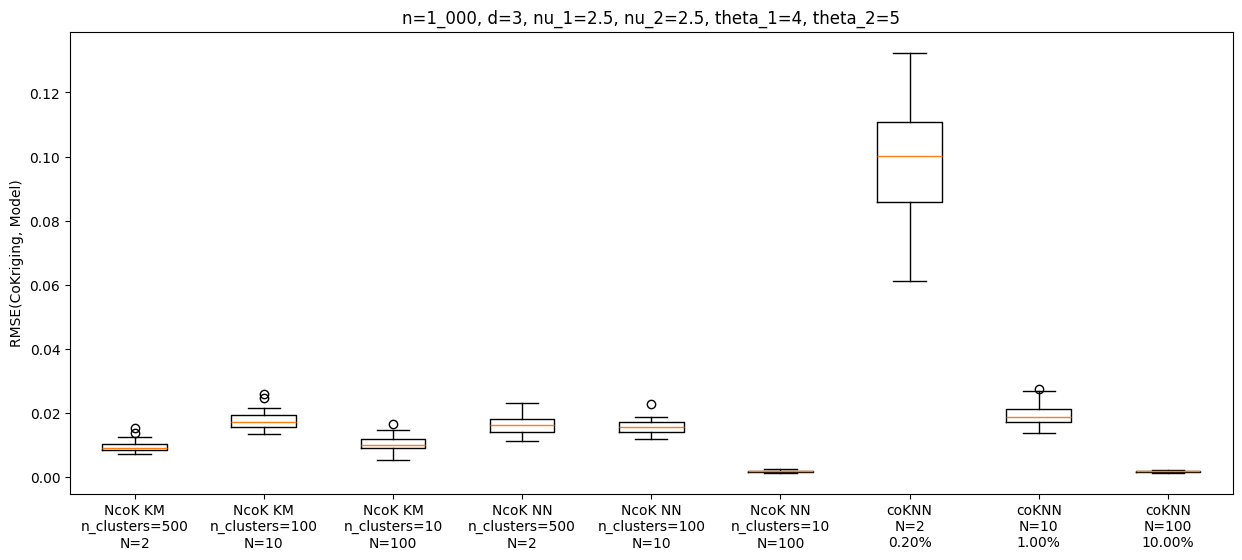

In [51]:
plt.figure(figsize=(15,6))

plt.boxplot(np.hstack([rmses_NcoK_KM, rmses_NcoK_NN, rmses_coKNN]))

plt.xticks(range(1, 1 + 2*len(ns_clusters) + len(Ns)),
           [f'NcoK KM\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'NcoK NN\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'coKNN\n{N=}\n{N/n:.2%}' for N in Ns])

plt.ylabel('RMSE(CoKriging, Model)')
plt.title(f'{n=:_.0f}, {d=}, {nu_1=}, {nu_2=}, {theta_1=}, {theta_2=}');

### Resultados RMSE vs Y_true

In [52]:
np.hstack([rmses_NcoK_KM_true, rmses_NcoK_NN_true, rmses_coKNN_true])

array([[0.01792207, 0.02622913, 0.01938692, 0.01945379, 0.01995616,
        0.01452548, 0.10266016, 0.02009479, 0.0145132 ],
       [0.01441608, 0.02269748, 0.01591779, 0.0202175 , 0.01539779,
        0.01367914, 0.11053761, 0.01935544, 0.01371527],
       [0.01570239, 0.02201297, 0.01233779, 0.01843899, 0.01851963,
        0.01042027, 0.11503266, 0.0210542 , 0.01046425],
       [0.01670232, 0.02906059, 0.01783723, 0.0201631 , 0.02253416,
        0.01291517, 0.13122434, 0.02757935, 0.0129239 ],
       [0.01794567, 0.02295295, 0.01543042, 0.02778063, 0.02410393,
        0.0153432 , 0.11849986, 0.02440434, 0.01524252],
       [0.01663986, 0.02311489, 0.01795505, 0.02813192, 0.02475332,
        0.01362015, 0.12485792, 0.02546418, 0.01359427],
       [0.01507897, 0.01751339, 0.01718906, 0.01919736, 0.01916065,
        0.01262089, 0.08937668, 0.02307075, 0.0126368 ],
       [0.01862643, 0.01932095, 0.01560163, 0.02177685, 0.01652548,
        0.01341835, 0.10184161, 0.01874819, 0.01343067],


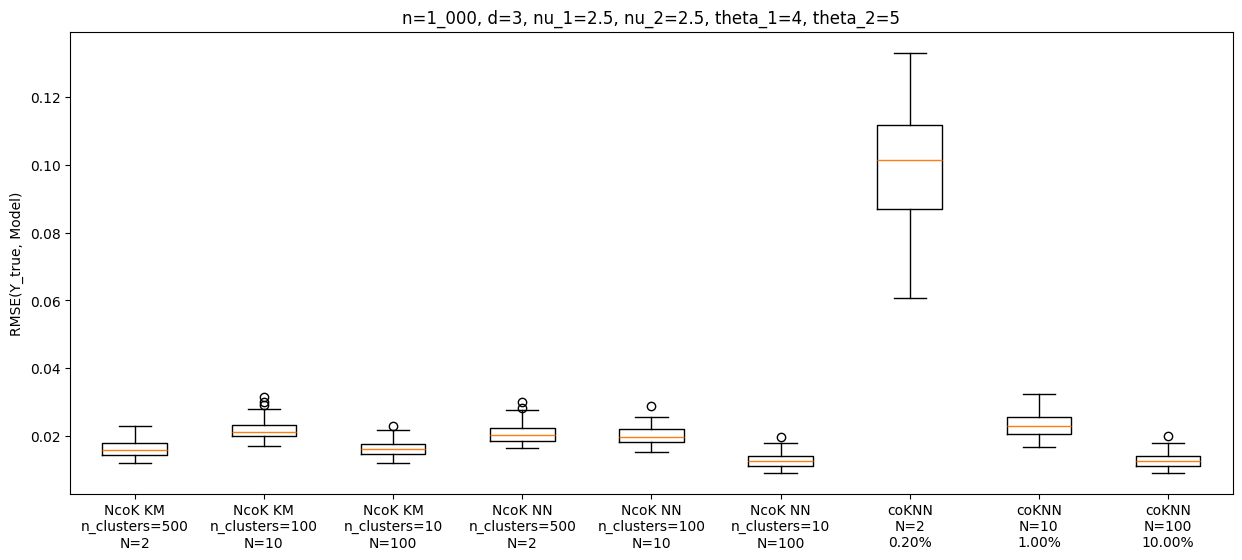

In [53]:
plt.figure(figsize=(15,6))

plt.boxplot(np.hstack([rmses_NcoK_KM_true, rmses_NcoK_NN_true, rmses_coKNN_true]))

plt.xticks(range(1, 1 + 2*len(ns_clusters) + len(Ns)),
           [f'NcoK KM\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'NcoK NN\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'coKNN\n{N=}\n{N/n:.2%}' for N in Ns])

plt.ylabel('RMSE(Y_true, Model)')
plt.title(f'{n=:_.0f}, {d=}, {nu_1=}, {nu_2=}, {theta_1=}, {theta_2=}');

### Resultados Times

In [54]:
np.hstack([times_NcoK_KM,times_NcoK_NN,times_coKNN])

array([[2.41014488e+01, 3.19999528e+00, 3.53344369e+00, 1.92279645e+03,
        8.79336948e+01, 9.65005279e+00, 3.35397720e-02, 6.52277470e-02,
        4.01087046e-01],
       [2.40170829e+01, 3.11671138e+00, 3.46660638e+00, 1.86951259e+03,
        8.55005713e+01, 9.55008769e+00, 1.78928375e-02, 6.64131641e-02,
        4.49858904e-01],
       [2.38971198e+01, 3.11749554e+00, 3.48415279e+00, 1.86565578e+03,
        8.61329377e+01, 9.56494451e+00, 3.35571766e-02, 6.63278103e-02,
        3.92432928e-01],
       [2.39215415e+01, 3.16687369e+00, 3.55008864e+00, 1.89159631e+03,
        8.57168646e+01, 9.79990172e+00, 3.28977108e-02, 4.96625900e-02,
        3.95335436e-01],
       [2.39505744e+01, 3.21642947e+00, 3.53349614e+00, 1.92846294e+03,
        8.76504934e+01, 9.70089531e+00, 3.32982540e-02, 4.97810841e-02,
        4.00022268e-01],
       [2.39337871e+01, 3.11637783e+00, 3.61972070e+00, 1.92194639e+03,
        8.89126658e+01, 9.71637082e+00, 2.54743099e-02, 4.97350693e-02,
        3.9

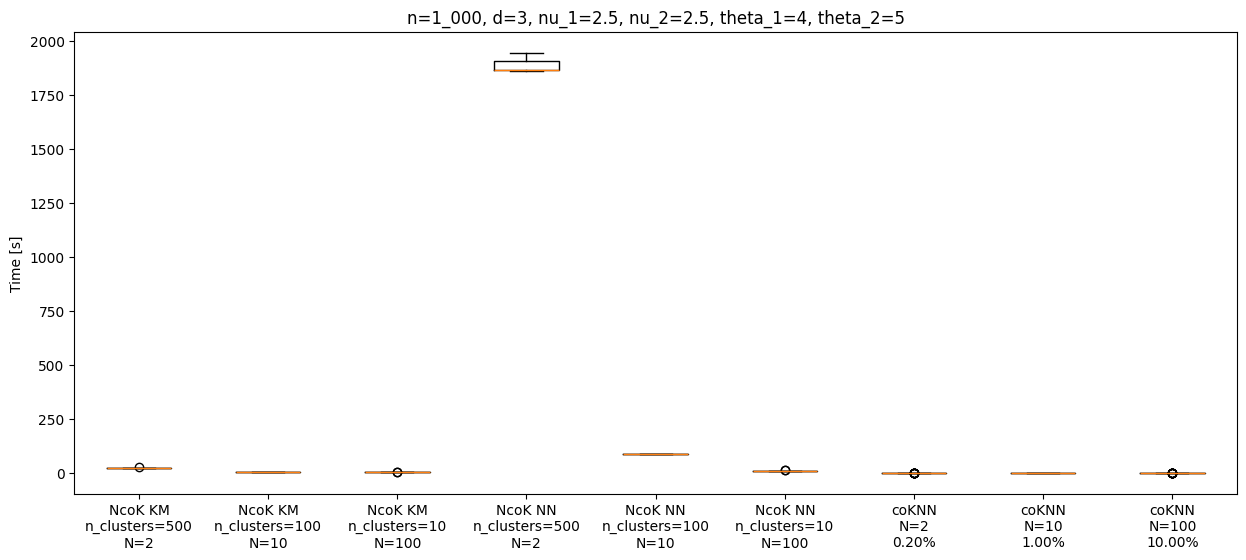

In [55]:
plt.figure(figsize=(15,6))

plt.boxplot(np.hstack([times_NcoK_KM,times_NcoK_NN,times_coKNN]))

plt.xticks(range(1, 1 + 2*len(ns_clusters) + len(Ns)),
           [f'NcoK KM\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'NcoK NN\n{n_clusters=}\nN={n//n_clusters}' for n_clusters in ns_clusters] + 
           [f'coKNN\n{N=}\n{N/n:.2%}' for N in Ns])

plt.ylabel('Time [s]')
plt.title(f'{n=:_.0f}, {d=}, {nu_1=}, {nu_2=}, {theta_1=}, {theta_2=}');